# Thinking probabilistically - Discrete variables
Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. In this chapter, you will learn how to think probabilistically about discrete quantities, those that can only take certain values, like integers. It is an important first step in building the probabilistic language necessary to think statistically.

# 1. Probabilistic logic and statistical inference
#### What is the goal of statistical inference?
Why do we do statistical inference?
* To draw probabilistic conclusions about what we might expect if we collected the same data again.
* To draw actionable conclusions from data.
* To draw more general conclusions from relatively few data or observations.
* All of these. __*__

Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

In [ ]:
# Import modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Set default Seaborn style
sns.set()

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

# 2. Random number generators and hacker statistics
## 2.1 Generating random numbers using the np.random module:
We will be hammering the `np.random` module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, `np.random.random()` for a test spin. The function returns a random number between zero and one. Call `np.random.random()` a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument `size=4` to `np.random.random()`. Such an approach is more efficient than a `for` loop: in this exercise, however, you will write a `for` loop to experience hacker statistics as the practice of repeating an experiment over and over again.

### Instructions:
* Seed the random number generator using the seed `42`.
* Initialize an empty array, `random_numbers`, of 100,000 entries to store the random numbers. Make sure you use `np.empty(100000)` to do this.
* Write a `for` loop to draw 100,000 random numbers using `np.random.random()`, storing them in the `random_numbers` array. To do so, loop over `range(100000)`.
* Plot a histogram of `random_numbers`. It is not necessary to label the axes in this case because we are just checking the random number generator. Hit 'Submit Answer' to show your plot.

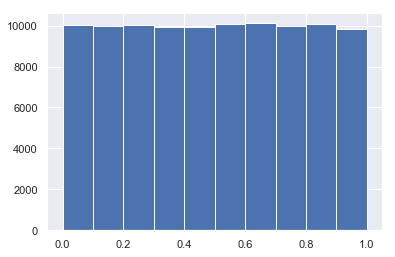

In [3]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

## 2.2 The np.random module and Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability $p$ of landing heads (success) and probability $1−p$ of landing tails (failure). In this exercise, you will write a function to perform `n` Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of `n` Bernoulli trials, each of which has probability `p` of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

### Instructions:
* Define a function with signature `perform_bernoulli_trials(n, p)`.
    * Initialize to zero a `variable n_success` the counter of `True` s, which are Bernoulli trial successes.
    * Write a `for` loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is `True`. Perform `n` iterations by looping over `range(n)`.
        * To perform a Bernoulli trial, choose a random number between zero and one using `np.random.random()`. If the number you chose is less than `p`, increment `n_success` (use the `+= 1` operator to achieve this).
    * The function returns the number of successes `n_success`.

In [4]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

## 2.3 How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to `True`, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

### Instructions:
* Seed the random number generator to 42.
* Initialize `n_defaults`, an empty array, `using np.empty()`. It should contain 1000 entries, since we are doing 1000 simulations.
* Write a `for` loop with `1000` iterations to compute the number of defaults per 100 loans using the `perform_bernoulli_trials()` function. It accepts two arguments: the number of trials `n` - in this case 100 - and the probability of success `p` - in this case the probability of a default, which is `0.05`. On each iteration of the loop store the result in an entry of `n_defaults`.
* Plot a histogram of `n_defaults`. Include the `normed=True` keyword argument so that the height of the bars of the histogram indicate the probability.

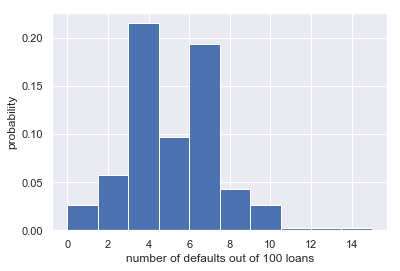

In [5]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

This is actually not an optimal way to plot a histogram when the results are known to be integers. We will revisit this in forthcoming exercises.

## 2.4 Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as `n_defaults`, as a CDF. The `ecdf()` function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

### Instructions:
* Compute the `x` and `y` values for the ECDF of `n_defaults`.
* Plot the ECDF, making sure to label the axes. Remember to include `marker = '.'` and `linestyle = 'none'` in addition to `x` and `y` in your call `plt.plot()`.
* Show the plot.
* Compute the total number of entries in your `n_defaults` array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of `n_defaults` is >= `10`. Then sum all the entries in this array using `np.sum()`. For example, `np.sum(n_defaults <= 5)` would compute the number of defaults with 5 or _fewer_ defaults.
* The probability that the bank loses money is the fraction of `n_defaults` that are greater than or equal to 10. Print this result by hitting 'Submit Answer'!

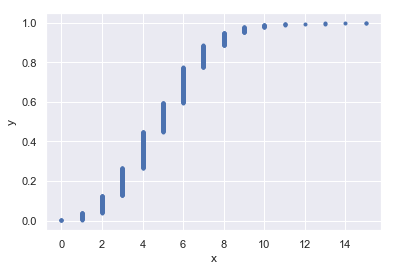

Probability of losing money = 0.022


In [6]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

# 3. Probability distributions and stories: The Binomial distribution
## 3.1 Sampling out of the Binomial distribution:
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with `np.random.seed(42)`) to save you typing that each time.

### Instructions:
* Draw samples out of the Binomial distribution using `np.random.binomial()`. You should use parameters `n = 100` and `p = 0.05`, and set the `size` keyword argument to `10000`.
* Compute the CDF using your previously-written `ecdf()` function.
* Plot the CDF with axis labels. The x-axis here is the number of defaults out of 100 loans, while the y-axis is the CDF.
* Show the plot.

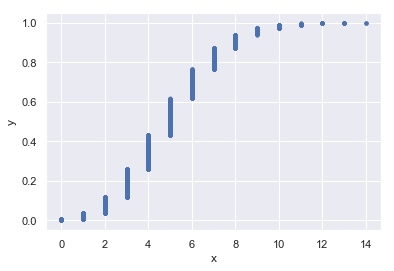

In [7]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y =ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

If you know the story, using built-in algorithms to directly sample out of the distribution is much faster.

## 3.2 Plotting the Binomial PMF:
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to `plt.hist()` via the `bins` keyword argument. We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5, ...` up to `max(n_defaults) + 1.5`. You can generate an array like this using `np.arange()` and then subtracting `0.5` from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array `n_defaults`.

### Instructions:
* Using `np.arange()`, compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable `bins`.
* Use `plt.hist()` to plot the histogram of `n_defaults` with the `normed=True` and `bins=bins` keyword arguments.
* Show the plot.

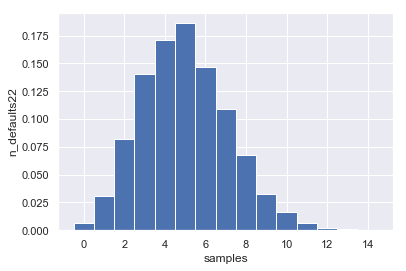

In [8]:
# Compute bin edges: bins
bins = np.arange(0, 15.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('samples')
_ = plt.ylabel('n_defaults22')

# Show the plot
plt.show()

# 4. Poisson processes and the Poisson distribution
## 4.1 Relationship between Binomial and Poisson distributions:
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters $n$ and $p$ such that $np=10$.

### Instructions:
* Using the `np.random.poisson()` function, draw `10000` samples from a Poisson distribution with a mean of `10`.
* Make a list of the `n` and `p` values to consider for the Binomial distribution. Choose `n = [20, 100, 1000]` and `p = [0.5, 0.1, 0.01]` so that $np$ is always 10.
* Using `np.random.binomial()` inside the provided `for` loop, draw `10000` samples from a Binomial distribution with each `n, p` pair and print the mean and standard deviation of the samples. There are 3 `n, p` pairs: `20, 0.5`, `100, 0.1`, and `1000, 0.01`. These can be accessed inside the loop as `n[i], p[i]`.

In [9]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:\t', np.mean(samples_poisson),'\t', np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:\t', np.mean(samples_binomial),'\t', np.std(samples_binomial))

Poisson:	 10.0145 	 3.1713545607516043
n = 20 Binom:	 10.0592 	 2.23523944131272
n = 100 Binom:	 10.0441 	 2.9942536949964675
n = 1000 Binom:	 10.0129 	 3.139639085946026


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability `p` gets lower and lower.

## 4.2 How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

_Note_: The no-hitter data set was scraped and calculated from the data sets available at [retrosheet.org](https://www.retrosheet.org/) ([license](https://www.retrosheet.org/notice.txt)).

### Possible Answers:
* Discrete uniform
* Binomial
* Poisson
* Both Binomial and Poisson, though Poisson is easier to model and compute.
* Both Binomial and Poisson, though Binomial is easier to model and compute.

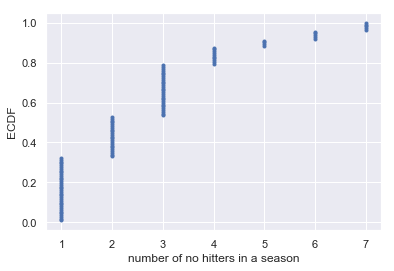

In [10]:
df = pd.read_csv('_datasets/mlb_nohitters.csv')
df['year'] = df['date'].apply(lambda x: int(x/10000))
n_nohitters = df.groupby('year').count()['date']
x, y = ecdf(n_nohitters)
_ = plt.plot(x, y, '.')
_ = plt.xlabel('number of no hitters in a season')
_ = plt.ylabel('ECDF')
plt.show()

### Answer:
__Both Binomial and Poisson, though Poisson is easier to model and compute.__

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

## 4.3 Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

### Instructions:
* Draw `10000` samples from a Poisson distribution with a mean of `251/115` and assign to `n_nohitters`.
* Determine how many of your samples had a result greater than or equal to `7` and assign to `n_large`.
* Compute the probability, `p_large`, of having `7` or more no-hitters by dividing `n_large` by the total number of samples (`10000`).
* Hit 'Submit Answer' to print the probability that you calculated.


In [11]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large = n_large/len(n_nohitters)

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.